In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = 'twitter_training.csv'
data = pd.read_csv(url, names = ['Id','Company', 'Sentiment', 'Tweet'])
print(data.shape)


(74682, 4)


In [2]:

data.head()

,Id,Company,Sentiment,Tweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
data['Company'].value_counts() 

Company
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)       

In [4]:
Madden_tweets=data[data['Company']=='MaddenNFL']
print(Madden_tweets)
Madden_tweets['Sentiment'].value_counts() 


         Id    Company Sentiment  \
63006  7601  MaddenNFL  Negative   
63007  7601  MaddenNFL  Negative   
63008  7601  MaddenNFL  Negative   
63009  7601  MaddenNFL  Negative   
63010  7601  MaddenNFL  Negative   
...     ...        ...       ...   
65401  8000  MaddenNFL  Negative   
65402  8000  MaddenNFL  Negative   
65403  8000  MaddenNFL  Negative   
65404  8000  MaddenNFL  Negative   
65405  8000  MaddenNFL  Negative   

                                                   Tweet  
63006  Bro fuck madden 21 why does the game modes nev...  
63007  Bro fuck madden 21 Why do the game modes never...  
63008  Bro fuck madden 21 why does the game modes nev...  
63009  Bro fuck madden 21 why does english game modes...  
63010  Bro fuck madden 21 guys why now does the game ...  
...                                                  ...  
65401  2k5 was the best football game I ever had.. Go...  
65402      2k5 was the best football game I've ever had.  
65403  2k5 was the best video game I

Sentiment
Negative      1710
Positive       396
Neutral        204
Irrelevant      90
Name: count, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Dropping rows with missing values
data.dropna(subset=['Tweet', 'Sentiment'], inplace=True)

# Setting up CountVectorizer with appropriate parameters
cv = CountVectorizer(stop_words='english', min_df=2, max_df=0.95, max_features=10000)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data['Tweet'].values,
    data['Sentiment'].values,
    random_state=50,
    test_size=0.2
)

# Creating a pipeline for vectorization and model training
pipeline = Pipeline([
    ('vectorizer', cv),
    ('classifier', MultinomialNB())
])

# Fitting the model with training data
pipeline.fit(X_train, y_train)

# Transforming the test data and predicting
y_pred = pipeline.predict(X_test)

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6887837837837838
              precision    recall  f1-score   support

  Irrelevant       0.70      0.53      0.60      2556
    Negative       0.69      0.80      0.74      4508
     Neutral       0.73      0.58      0.65      3602
    Positive       0.66      0.76      0.71      4134

    accuracy                           0.69     14800
   macro avg       0.69      0.67      0.67     14800
weighted avg       0.69      0.69      0.68     14800



In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import  ExtraTreesClassifier 

# Define your classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Extra Trees Classifier' : ExtraTreesClassifier()
}

# Loop through classifiers to evaluate each one
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('vectorizer', CountVectorizer(stop_words='english', min_df=2, max_df=0.95, max_features=10000)),
        ('classifier', clf)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("="*60)


Model: Logistic Regression
Accuracy: 0.7837837837837838
              precision    recall  f1-score   support

  Irrelevant       0.81      0.68      0.74      2556
    Negative       0.81      0.83      0.82      4508
     Neutral       0.81      0.73      0.77      3602
    Positive       0.73      0.84      0.78      4134

    accuracy                           0.78     14800
   macro avg       0.79      0.77      0.78     14800
weighted avg       0.79      0.78      0.78     14800

Model: Naive Bayes
Accuracy: 0.6887837837837838
              precision    recall  f1-score   support

  Irrelevant       0.70      0.53      0.60      2556
    Negative       0.69      0.80      0.74      4508
     Neutral       0.73      0.58      0.65      3602
    Positive       0.66      0.76      0.71      4134

    accuracy                           0.69     14800
   macro avg       0.69      0.67      0.67     14800
weighted avg       0.69      0.69      0.68     14800

Model: Extra Trees Classif

In [7]:
# Dropping rows with missing values in Madden tweets
Madden_tweets.dropna(subset=['Tweet', 'Sentiment'], inplace=True)

# Splitting the Madden tweets data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    Madden_tweets['Tweet'].values,
    Madden_tweets['Sentiment'].values,
    random_state=50,
    test_size=0.2
)

# Define your classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Extra Trees Classifier': ExtraTreesClassifier()
}

# Loop through classifiers to evaluate each one
for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('vectorizer', CountVectorizer(stop_words='english', min_df=2, max_df=0.95, max_features=10000)),
        ('classifier', clf)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("="*60)


Model: Logistic Regression
Accuracy: 0.957983193277311
              precision    recall  f1-score   support

  Irrelevant       1.00      0.64      0.78        14
    Negative       0.95      0.99      0.97       359
     Neutral       1.00      0.83      0.91        36
    Positive       0.95      0.90      0.92        67

    accuracy                           0.96       476
   macro avg       0.98      0.84      0.90       476
weighted avg       0.96      0.96      0.96       476



C:\Users\ITWORK\AppData\Local\Temp\ipykernel_388\3177944071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Madden_tweets.dropna(subset=['Tweet', 'Sentiment'], inplace=True)


Model: Naive Bayes
Accuracy: 0.9411764705882353
              precision    recall  f1-score   support

  Irrelevant       0.90      0.64      0.75        14
    Negative       0.95      0.98      0.96       359
     Neutral       0.89      0.86      0.87        36
    Positive       0.95      0.84      0.89        67

    accuracy                           0.94       476
   macro avg       0.92      0.83      0.87       476
weighted avg       0.94      0.94      0.94       476

Model: Extra Trees Classifier
Accuracy: 0.9663865546218487
              precision    recall  f1-score   support

  Irrelevant       1.00      0.79      0.88        14
    Negative       0.97      0.99      0.98       359
     Neutral       1.00      0.89      0.94        36
    Positive       0.94      0.93      0.93        67

    accuracy                           0.97       476
   macro avg       0.98      0.90      0.93       476
weighted avg       0.97      0.97      0.97       476



In [8]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer

# Use TF-IDF Vectorizer instead of CountVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=2, max_df=0.95, max_features=10000)

# Define classifiers with hyperparameter tuning
param_grid = {
    'Logistic Regression': {
        'classifier__C': [0.1, 1, 10]
    },
    'Naive Bayes': {
        'classifier__alpha': [0.1, 1, 10]
    },
    'Extra Trees Classifier': {
        'classifier__n_estimators': [50, 100, 200]
    }
}

for name, clf in classifiers.items():
    pipeline = Pipeline([
        ('vectorizer', vectorizer),
        ('classifier', clf)
    ])
    
    # Use GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Best estimator
    best_model = grid_search.best_estimator_
    
    # Cross-validated performance
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    
    # Predict and evaluate
    y_pred = best_model.predict(X_test)
    
    print(f"Model: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Cross-validated Accuracy: {cv_scores.mean()} ± {cv_scores.std()}")
    print(f"Test Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("="*60)


Model: Logistic Regression
Best Parameters: {'classifier__C': 10}
Cross-validated Accuracy: 0.9626495372288991 ± 0.014067645298448641
Test Accuracy: 0.9747899159663865
              precision    recall  f1-score   support

  Irrelevant       1.00      0.79      0.88        14
    Negative       0.97      1.00      0.98       359
     Neutral       1.00      0.92      0.96        36
    Positive       0.98      0.93      0.95        67

    accuracy                           0.97       476
   macro avg       0.99      0.91      0.94       476
weighted avg       0.98      0.97      0.97       476

Model: Naive Bayes
Best Parameters: {'classifier__alpha': 0.1}
Cross-validated Accuracy: 0.9452838789888105 ± 0.015931724692701186
Test Accuracy: 0.9684873949579832
              precision    recall  f1-score   support

  Irrelevant       1.00      0.64      0.78        14
    Negative       0.96      1.00      0.98       359
     Neutral       0.97      0.92      0.94        36
    Positive   

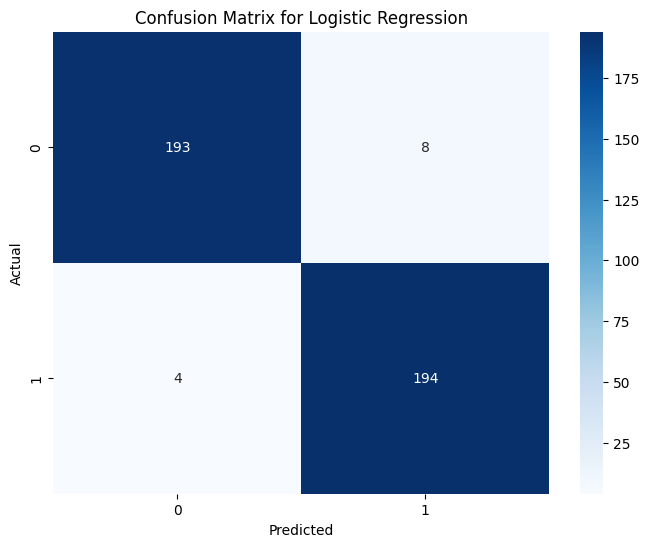

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_20newsgroups

# Sample data loading and splitting (using 20 newsgroups dataset as an example)
data = fetch_20newsgroups(subset='all', categories=['rec.sport.baseball', 'rec.sport.hockey'], shuffle=True, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Define a simple classifier and vectorizer for testing
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', min_df=2, max_df=0.95, max_features=10000)),
    ('classifier', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


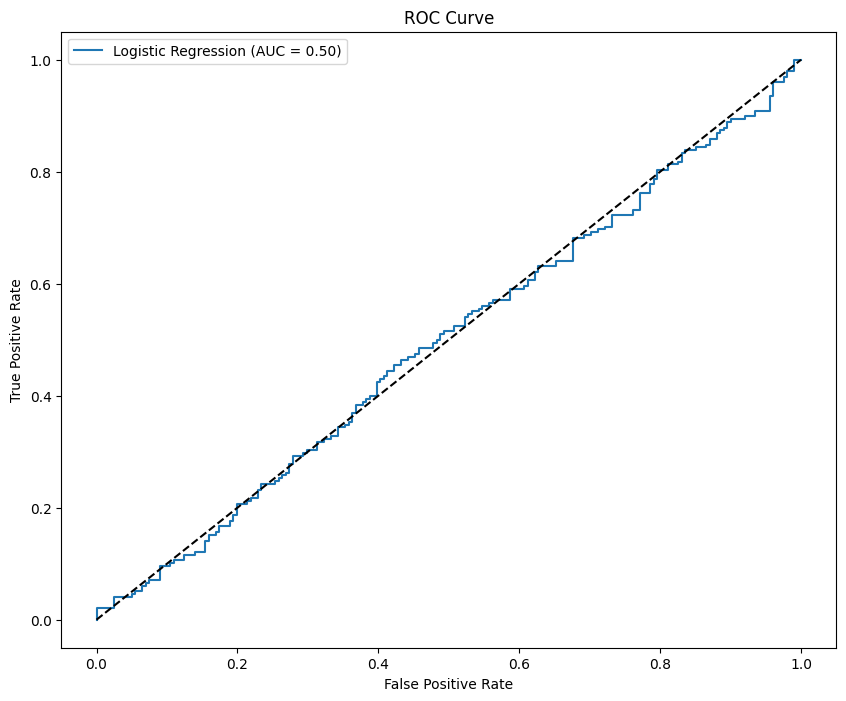

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc = roc_auc_score(y_test, y_proba)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


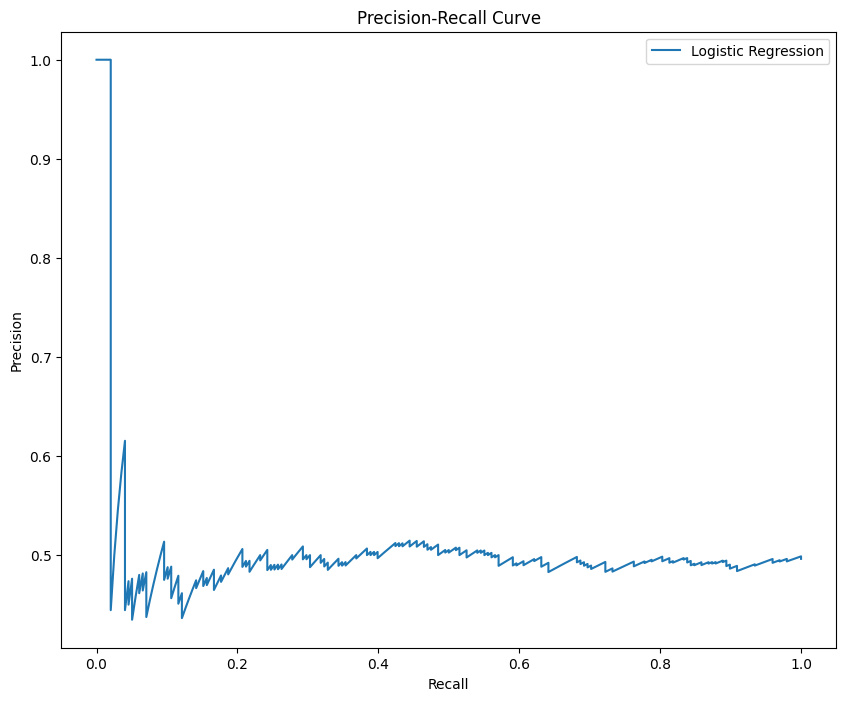

In [23]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    
    plt.plot(recall, precision, label=name)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()


In [29]:
# List of new tweets to classify
new_tweets = [
    "This game is fantastic! I love playing it every day.",
    "This game is terrible! I hate playing it.",
    "The graphics are amazing, but the gameplay is dull.",
    "I enjoy the multiplayer mode a lot!",
    "The recent update ruined the game for me."
]

# Loop through the models in the best_models dictionary
for name, model in best_models.items():
    predictions = model.predict(new_tweets)
    probabilities = model.predict_proba(new_tweets)
    
    print(f"Model: {name}")
    for i, tweet in enumerate(new_tweets):
        print(f"Tweet: {tweet}")
        print(f"Prediction: {predictions[i]}")
        print(f"Probability: {probabilities[i]}")
        print("-" * 70)


Model: Logistic Regression
Tweet: This game is fantastic! I love playing it every day.
Prediction: Positive
Probability: [0.13239661 0.24467674 0.02101733 0.60190931]
----------------------------------------------------------------------
Tweet: This game is terrible! I hate playing it.
Prediction: Negative
Probability: [9.60531208e-04 9.95389072e-01 1.52856343e-03 2.12183301e-03]
----------------------------------------------------------------------
Tweet: The graphics are amazing, but the gameplay is dull.
Prediction: Positive
Probability: [0.01149031 0.35064574 0.011404   0.62645994]
----------------------------------------------------------------------
Tweet: I enjoy the multiplayer mode a lot!
Prediction: Negative
Probability: [0.01213166 0.90926127 0.01467887 0.0639282 ]
----------------------------------------------------------------------
Tweet: The recent update ruined the game for me.
Prediction: Negative
Probability: [0.01326585 0.95438105 0.01321167 0.01914143]
-------------